**Importing dataset file**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


**K-means Clustering**

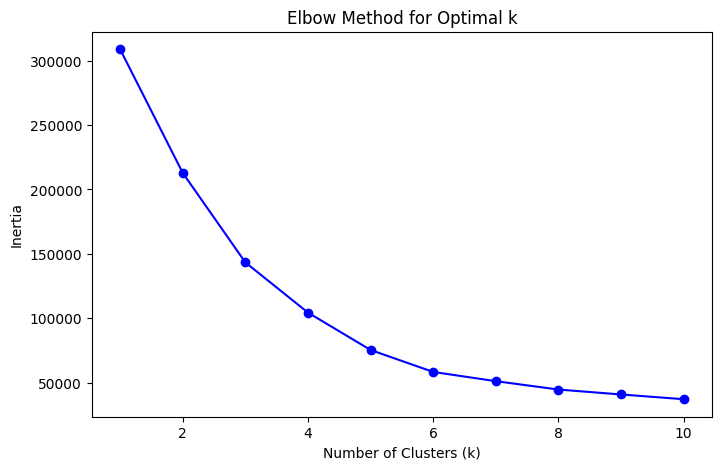

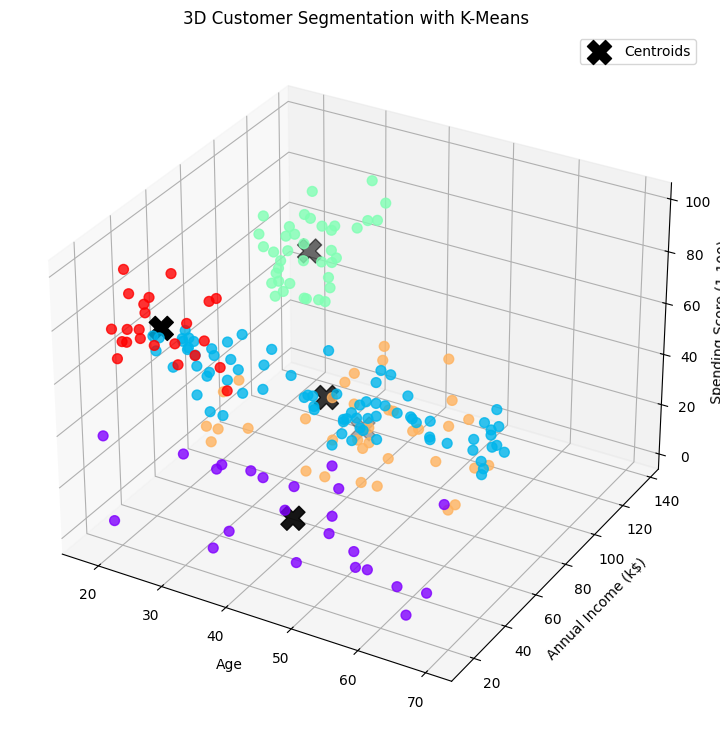

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

data = pd.read_csv("Mall_Customers.csv")
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()
print("\n")
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(X)
fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X['Age'], X['Annual Income (k$)'], X['Spending Score (1-100)'],
                c=data['Cluster'], cmap='rainbow', s=50, alpha=0.8)
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2],
           s=300, c='black', marker='X', label='Centroids')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D Customer Segmentation with K-Means')
ax.legend()
plt.show()

data.to_csv("Clustered_Customers_3D.csv", index=False)